In [15]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from torch_geometric.data import Dataset


def analyze_dataset(ds: Dataset, name: str = "", feature_attr: str = "x") -> dict:
    """
    Compute statistics for a PyG dataset and plot side-by-side distribution of data.k
    for positive (y=1) and negative (y=0) graphs.
    """
    # --- collect k values ---
    pos_ks, neg_ks = [], []
    for d in ds:
        if int(d.y.item()) == 1:
            pos_ks.append(int(d.k.item()))
        else:
            neg_ks.append(int(d.k.item()))

    pos_k_counter = Counter(pos_ks)
    neg_k_counter = Counter(neg_ks)

    # union of all ks
    all_labels = sorted(set(pos_k_counter) | set(neg_k_counter))
    pos_counts = [pos_k_counter.get(k, 0) for k in all_labels]
    neg_counts = [neg_k_counter.get(k, 0) for k in all_labels]

    summary = {
        "dataset": name,
        "num_graphs": len(ds),
        "unique_k": len(all_labels),
        "pos_k_distribution": dict(pos_k_counter),
        "neg_k_distribution": dict(neg_k_counter),
    }

    print(f"{name}: {len(ds)} graphs, {len(all_labels)} unique k values")

    # --- side-by-side bar plot ---
    x = np.arange(len(all_labels))
    width = 0.4

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - width/2, pos_counts, width, label="positive (y=1)", color="royalblue", edgecolor="black")
    ax.bar(x + width/2, neg_counts, width, label="negative (y=0)", color="darkorange", edgecolor="black")

    ax.set_xticks(x)
    ax.set_xticklabels(all_labels, rotation=90)
    ax.set_xlabel("k")
    ax.set_ylabel("count")
    ax.set_title(f"{name} – Distribution of k by label")
    ax.legend()

    plt.tight_layout()
    plt.show()

    return summary


train: 17124626 graphs, 8 unique k values


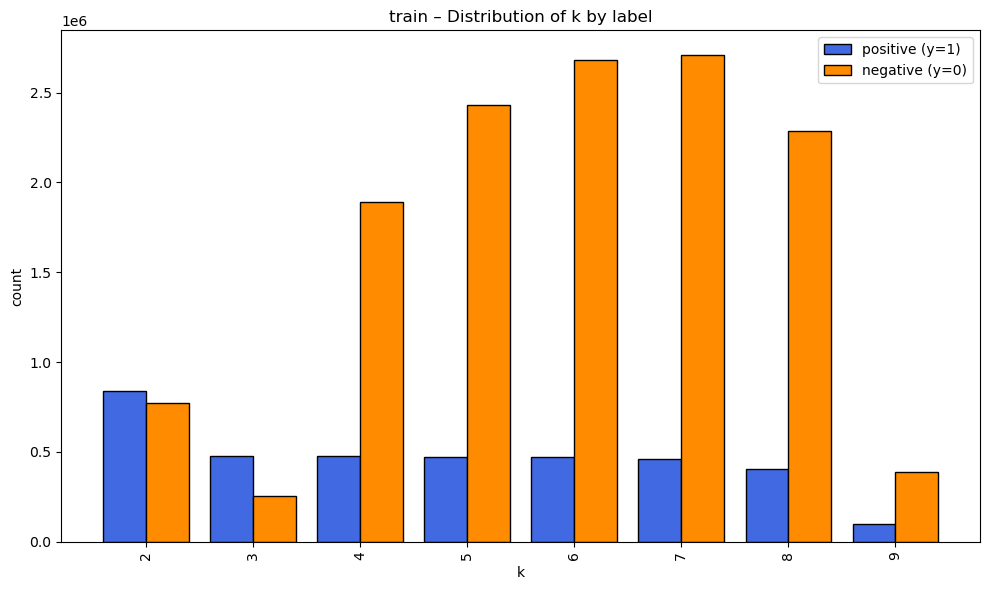

{'dataset': 'train',
 'neg_k_distribution': {2: 773050,
                        3: 257375,
                        4: 1892239,
                        5: 2431418,
                        6: 2681384,
                        7: 2710536,
                        8: 2286397,
                        9: 388796},
 'num_graphs': 17124626,
 'pos_k_distribution': {2: 840667,
                        3: 475384,
                        4: 475150,
                        5: 474467,
                        6: 471909,
                        7: 461051,
                        8: 405837,
                        9: 98966},
 'unique_k': 8}
valid: 1441946 graphs, 8 unique k values


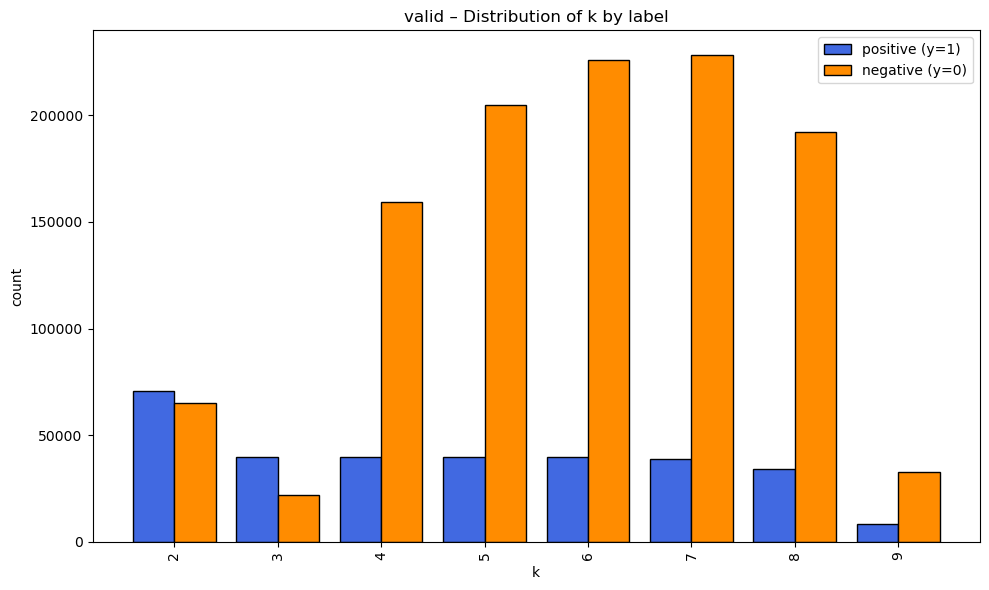

{'dataset': 'valid',
 'neg_k_distribution': {2: 65091,
                        3: 21970,
                        4: 159170,
                        5: 205021,
                        6: 226161,
                        7: 228448,
                        8: 192060,
                        9: 32526},
 'num_graphs': 1441946,
 'pos_k_distribution': {2: 70793,
                        3: 39989,
                        4: 39975,
                        5: 39913,
                        6: 39720,
                        7: 38824,
                        8: 34006,
                        9: 8279},
 'unique_k': 8}
test: 721712 graphs, 8 unique k values


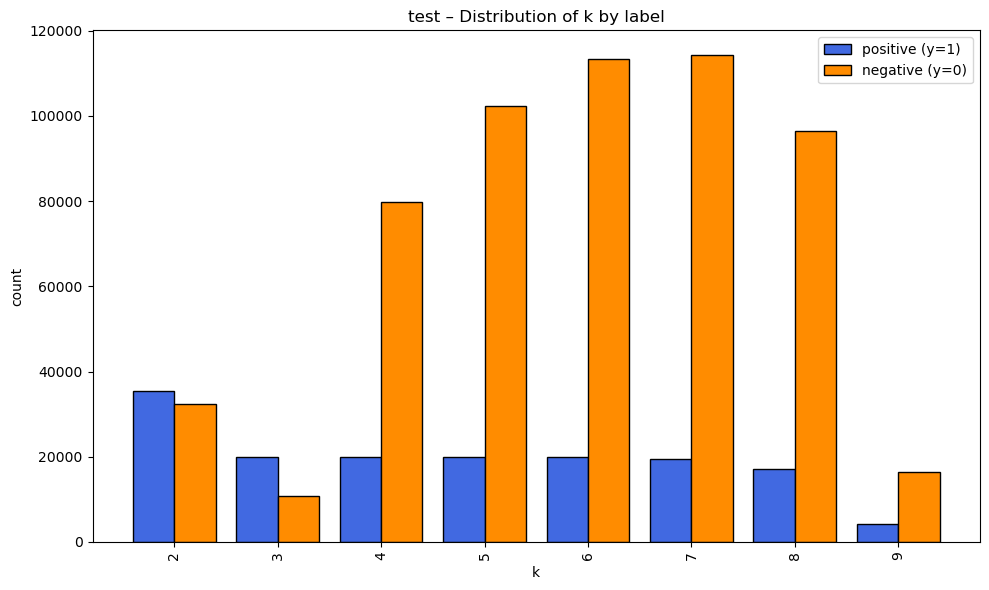

{'dataset': 'test',
 'neg_k_distribution': {2: 32483,
                        3: 10856,
                        4: 79751,
                        5: 102397,
                        6: 113273,
                        7: 114395,
                        8: 96375,
                        9: 16329},
 'num_graphs': 721712,
 'pos_k_distribution': {2: 35381,
                        3: 19991,
                        4: 19986,
                        5: 19958,
                        6: 19870,
                        7: 19432,
                        8: 17079,
                        9: 4156},
 'unique_k': 8}


In [16]:
from src.datasets.qm9_smiles_generation import QM9Smiles
from src.datasets.qm9_pairs import QM9Pairs
from pprint import pprint

for split in ["train", "valid", "test"]:
    ds = QM9Pairs(split=split, base_dataset=QM9Smiles(split=split))
    stats = analyze_dataset(ds, name=split)
    pprint(stats)

train: 29036 graphs, 8 unique k values


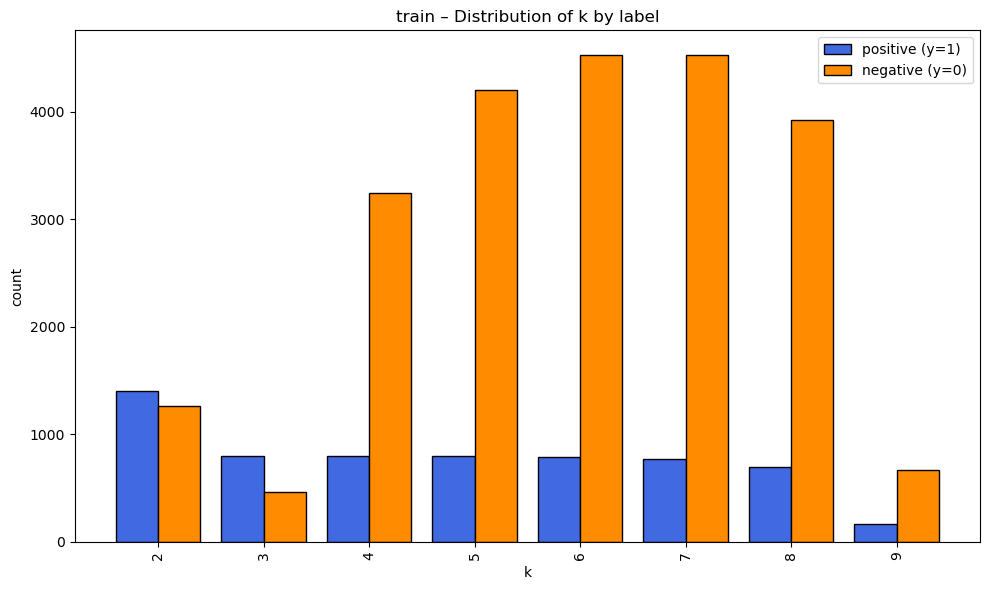

{'dataset': 'train',
 'neg_k_distribution': {2: 1259,
                        3: 460,
                        4: 3248,
                        5: 4200,
                        6: 4523,
                        7: 4530,
                        8: 3924,
                        9: 668},
 'num_graphs': 29036,
 'pos_k_distribution': {2: 1407,
                        3: 800,
                        4: 800,
                        5: 798,
                        6: 786,
                        7: 768,
                        8: 695,
                        9: 170},
 'unique_k': 8}
valid: 2895 graphs, 8 unique k values


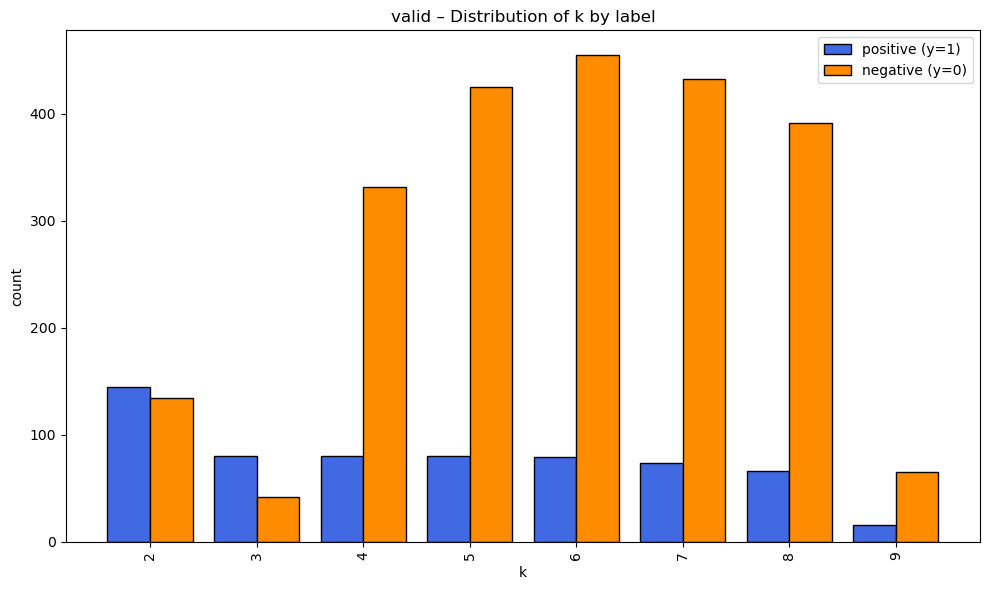

{'dataset': 'valid',
 'neg_k_distribution': {2: 134,
                        3: 42,
                        4: 331,
                        5: 425,
                        6: 455,
                        7: 432,
                        8: 391,
                        9: 65},
 'num_graphs': 2895,
 'pos_k_distribution': {2: 145,
                        3: 80,
                        4: 80,
                        5: 80,
                        6: 79,
                        7: 74,
                        8: 66,
                        9: 16},
 'unique_k': 8}
test: 2948 graphs, 8 unique k values


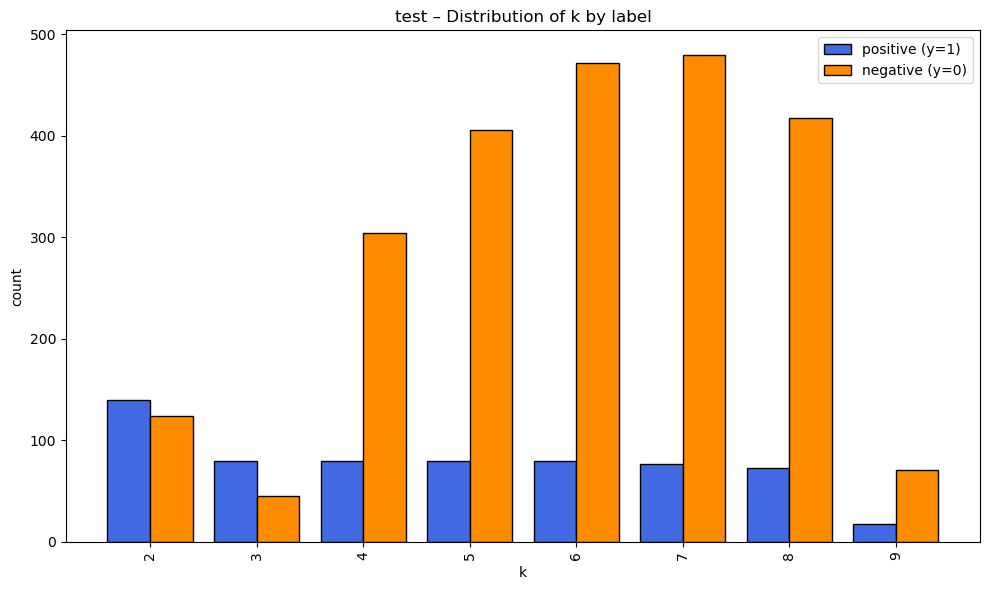

{'dataset': 'test',
 'neg_k_distribution': {2: 124,
                        3: 45,
                        4: 304,
                        5: 406,
                        6: 472,
                        7: 480,
                        8: 418,
                        9: 71},
 'num_graphs': 2948,
 'pos_k_distribution': {2: 140,
                        3: 80,
                        4: 80,
                        5: 80,
                        6: 80,
                        7: 77,
                        8: 73,
                        9: 18},
 'unique_k': 8}


In [17]:
for split in ["train", "valid", "test"]:
    ds = QM9Pairs(split=split, base_dataset=QM9Smiles(split=split), dev=True)
    stats = analyze_dataset(ds, name=split)
    pprint(stats)